In [ ]:
import torch
import numpy as np

sample_surface_path = '/mntdata/shapenet/surfaces/02691156/4_pointcloud/1a04e3eab45ca15dd86060f189eb133.npz'
sample_surface = np.load(sample_surface_path)
for k in ['points', 'normals', 'loc', 'scale']:
    print(k, sample_surface[k].shape, sample_surface[k].dtype)
    if k in ['loc', 'scale']:
        print(sample_surface[k])

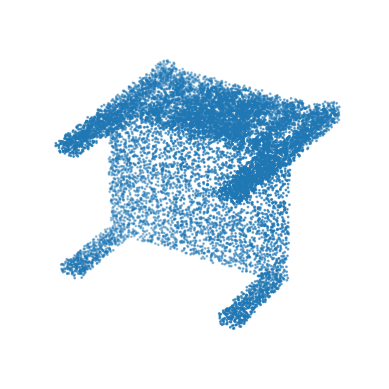

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

sample_path = Path('/mntdata/shapenet/sample')
hash_id = 'a6d282a360621055614d73f24792753f'
sample_pts_path = sample_path / 'points' / f'{hash_id}.npz'
sample_pts = np.load(sample_pts_path)
[sample_pts['vol_points'].shape,
sample_pts['vol_label'].shape,
sample_pts['near_points'].shape,
sample_pts['near_label'].shape]

sample_surface_path = sample_path / 'surface' / f'{hash_id}.npz'
sample_surface = np.load(sample_surface_path)
data = sample_pts['vol_points'][sample_pts['vol_label'] > 0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_axis_off()  
plt.show()



In [2]:
import plotly.graph_objects as go
import numpy as np


x, y, z = np.meshgrid(np.arange(-5, 6, 1),
                      np.arange(-5, 6, 1),
                      np.arange(-5, 6, 1))


x = x.flatten()
y = y.flatten()
z = z.flatten()


fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=z,                
        colorscale='Viridis',   
        opacity=0.8
    )
)])


fig.update_layout(scene=dict(
                    xaxis=dict(visible=False),
                    yaxis=dict(visible=False),
                    zaxis=dict(visible=False)),
                  title="3D Point Grid")


fig.write_html("3d_point_grid.html")